# Exploration

Things to know:
- Figure is a container for axis
- Functions should be a pure functions
- Figsize is the most confusing argument (how can I make a printable A4 pdf?) 

In [1]:
from matplotlib import pyplot as plt
import numpy as np

Figure is the base: https://matplotlib.org/stable/users/explain/figure/figure_intro.html#figure-intro

In [2]:
def despine(axis: plt.Axes, which_spines: list = ["top", "right"]) -> plt.Axes:
    """
    Remove the top and right spines from the axis.
    :param axis:
    :param which_spines:
    :return:
    """
    return axis.spines[which_spines].set_visible(False)


def add_arrows_to_axis(axis: plt.Axes) -> plt.Axes:
    xmin, xmax = axis.get_xlim()
    ymin, ymax = axis.get_ylim()
    axis.plot(
        xmin,
        ymax,
        "^k",
        transform=axis.get_yaxis_transform(),
        clip_on=False,
        zorder=10,
        label="y_arrow",
    )
    axis.plot(
        xmax,
        ymin,
        ">k",
        transform=axis.get_xaxis_transform(),
        clip_on=False,
        zorder=10,
        label="x_arrow",
    )
    return axis


def add_labels_to_lines(
    axis: plt.Axes, label: str, x_delta: float = 0.02, y_delta: float = 0
) -> plt.Axes:
    for line in axis.lines:
        if line.get_label().startswith(label):
            latest_x, latest_y = line.get_data()

    axis.text(
        latest_x[-1] + x_delta,
        latest_y[-1] + y_delta,
        label,
        ha="left",
        va="center",
        fontsize=12,
    )

    return axis


def remove_ticks(axis: plt.Axes) -> plt.Axes:
    axis.tick_params(axis="both", which="both", length=0)
    axis.set_xticks([])
    axis.set_yticks([])
    return axis

In [3]:
def plot_common_chart():
    """
    Plot a common chart with specified x and y values.

    Parameters:
        x (array-like): x values for plotting.
        y_values (dict): Dictionary of y values with keys as labels.
        figsize (tuple, optional): Size of the figure. Defaults to (6, 4).
    """
    with plt.xkcd():

        def y(x):
            return x + np.sin(x * x * 8) / 4

        fig, ax = plt.subplots(figsize=(6, 4))

        ax.set_title("Title", loc="left", fontweight="bold", fontsize=18, pad=20)

        ax.set_ylabel(
            "y-label",
            fontsize=12,
            labelpad=10,
            rotation=0,
            loc="top",
            fontstyle="italic",
        )
        ax.set_xlabel(
            "x-label", fontsize=12, labelpad=10, loc="right", fontstyle="italic"
        )

        x = np.linspace(0, 1, 100)
        ax.plot(x, y(x), linewidth=4, color="black", label="label 1")
        ax.plot(x, x, linewidth=4, color="lightsteelblue", label="label 2")

        ax.set_ylim(bottom=0)
        ax.set_xlim(left=0, right=1)

        ax.scatter(0.5, y(0.5), s=100, color="indianred", zorder=10)
        ax.annotate(
            "Data Point",
            xy=(0.5, y(0.5)),
            xytext=(0.5, y(0.5) + 0.1),
            arrowprops=dict(arrowstyle="->"),
            zorder=11,
        )

        add_labels_to_lines(ax, "label 1")
        add_labels_to_lines(ax, "label 2")
        despine(ax)
        add_arrows_to_axis(ax)
        remove_ticks(ax)

        ax.text(
            x=0,
            y=-0.2,
            s="Notes/Sources/Credits:_________",
            fontsize=12,
            ha="left",
            transform=ax.transAxes,
        )

        fig.tight_layout()

        return fig

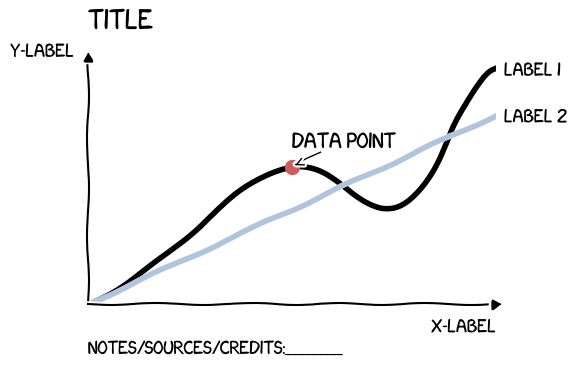

In [4]:
from pathlib import Path

results_dir = Path("results")
results_dir.mkdir(parents=True, exist_ok=True)
fig = plot_common_chart()
save_path = results_dir.joinpath("common_chart.pdf")
fig.savefig(f"{save_path}", format="pdf", bbox_inches="tight", pad_inches=0.5)

`%matplotlib inline` is an interesting thing.
first time the plot is shown when we call `generate_xkcd_figure()`
second time is when `plt.show(fig)` is called
third because `plt.show(fig)` returns `Null` the notebook outputs the value of the last expression in a cell:)

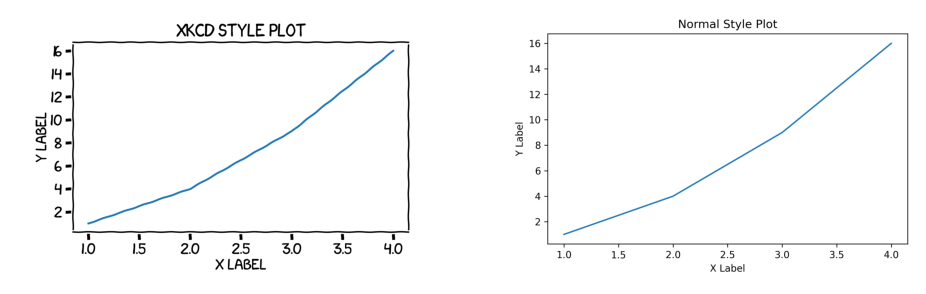

In [5]:
import matplotlib.pyplot as plt
from io import BytesIO


def generate_xkcd_figure():
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
        ax.plot([1, 2, 3, 4], [1, 4, 9, 16])
        ax.set_xlabel("X Label")
        ax.set_ylabel("Y Label")
        ax.set_title("XKCD Style Plot")
        fig.tight_layout()
        return fig


def generate_normal_figure():
    fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
    ax.plot([1, 2, 3, 4], [1, 4, 9, 16])
    ax.set_xlabel("X Label")
    ax.set_ylabel("Y Label")
    ax.set_title("Normal Style Plot")
    fig.tight_layout()
    return fig


def save_figures_to_bytes():
    # Generate the XKCD-style figure
    xkcd_fig = generate_xkcd_figure()
    xkcd_buffer = BytesIO()
    xkcd_fig.savefig(xkcd_buffer, format="png")
    xkcd_buffer.seek(0)
    plt.close(xkcd_fig)

    # Generate the normal-style figure
    normal_fig = generate_normal_figure()
    normal_buffer = BytesIO()
    normal_fig.savefig(normal_buffer, format="png")
    normal_buffer.seek(0)
    plt.close(normal_fig)

    return xkcd_buffer, normal_buffer


def display_side_by_side(xkcd_buffer, normal_buffer):
    xkcd_img = plt.imread(xkcd_buffer)
    normal_img = plt.imread(normal_buffer)

    fig, axes = plt.subplots(1, 2, figsize=(11.7, 8.3))  # A4 size in inches

    axes[0].imshow(xkcd_img)
    axes[0].axis("off")

    axes[1].imshow(normal_img)
    axes[1].axis("off")
    fig.savefig("combined_plots.pdf", format="pdf")
    return fig


xkcd_buffer, normal_buffer = save_figures_to_bytes()
display_side_by_side(xkcd_buffer, normal_buffer)

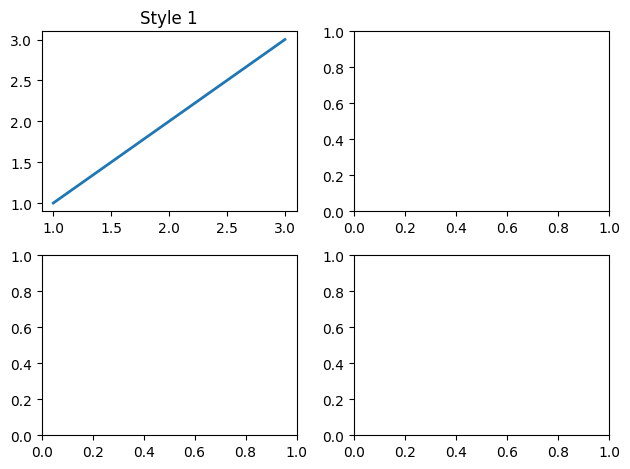

In [12]:
from contextlib import contextmanager
import matplotlib.pyplot as plt


def apply_style(style_dict):
    """Apply style to matplotlib."""
    plt.rcParams.update(style_dict)


@contextmanager
def styled_figure(styles):
    """Context manager for applying different styles to matplotlib figures."""
    # Save current style
    original_style = plt.rcParams.copy()
    try:
        # Apply desired style
        apply_style(styles)
        # Yield control back to the caller
        yield
    finally:
        # Restore original style
        apply_style(original_style)


# Define different styles for each axis
axis_styles = [
    {
        "font.family": ["xkcd", "Humor Sans", "Comic Sans MS"],
        "lines.linewidth": 2,
        "lines.color": "xkcd:blue",
        "axes.labelsize": 14,
        "axes.labelcolor": "xkcd:red",
        "axes.linewidth": 2,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
    },
    {"lines.linestyle": "--", "lines.linewidth": 2, "axes.labelsize": 12},
    {"lines.linestyle": ":", "lines.linewidth": 1.5, "axes.labelsize": 10},
    {"lines.linestyle": "-.", "lines.linewidth": 1, "axes.labelsize": 8},
    {"lines.linestyle": "-", "lines.linewidth": 1.2, "axes.labelsize": 9},
]

# Example of usage
# with styled_figure(axis_styles[0]):
#     fig, axes = plt.subplots(2, 2)
#     for ax, style in zip(axes.flatten(), axis_styles):
#         with styled_figure(style):
#             ax.plot([1, 2, 3], [1, 2, 3])
#     plt.show()


fig, ax = plt.subplots(2, 2)

with styled_figure(axis_styles[0]):
    ax[0, 0].plot([1, 2, 3], [1, 2, 3])
    ax[0, 0].set_title("Style 1")

fig.tight_layout()
plt.show()

# Axes

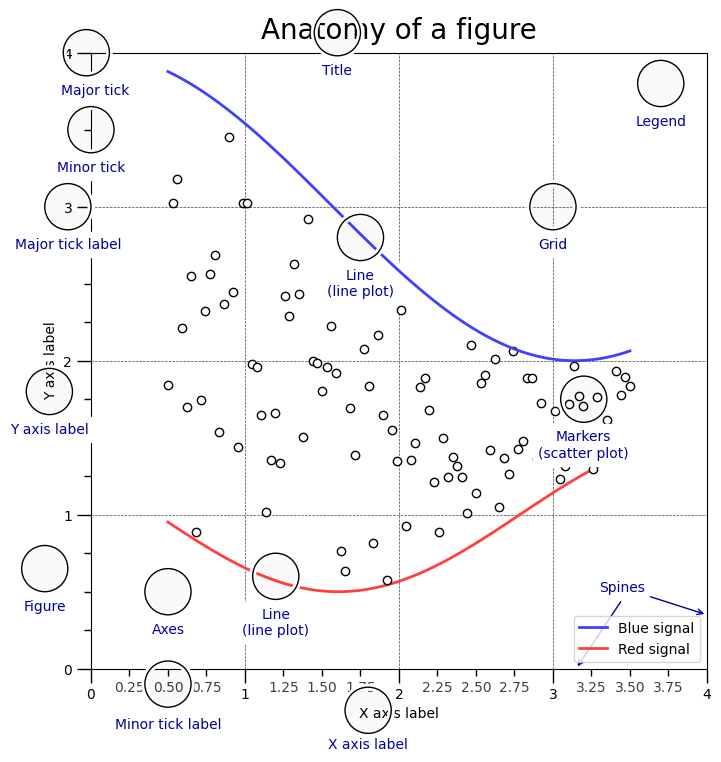

In [3]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(123)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x


ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which="major", width=1.0)
ax.tick_params(which="major", length=10)
ax.tick_params(which="minor", width=1.0, labelsize=10)
ax.tick_params(which="minor", length=5, labelsize=10, labelcolor="0.25")

ax.grid(linestyle="--", linewidth=0.5, color=".25", zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0, marker="o", markerfacecolor="w", markeredgecolor="k")

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment="bottom")
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke

    circle = Circle(
        (x, y),
        radius,
        clip_on=False,
        zorder=10,
        linewidth=1,
        edgecolor="black",
        facecolor=(0, 0, 0, 0.0125),
        path_effects=[withStroke(linewidth=5, foreground="w")],
    )
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(
        x,
        y,
        text,
        backgroundcolor="white",
        # fontname="Yanone Kaffeesatz", fontsize="large",
        ha="center",
        va="top",
        weight="regular",
        color="#000099",
    )


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = "#000099"
ax.annotate(
    "Spines",
    xy=(4.0, 0.35),
    xytext=(3.3, 0.5),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

ax.annotate(
    "",
    xy=(3.15, 0.0),
    xytext=(3.45, 0.45),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

plt.savefig("../../docs/source/images/anatomy.png", dpi=600)
plt.show()